In [1]:
# taken from internet: Python code for 2D random walk.
import numpy
import pylab
import random
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.graph_objs import Scatter, Layout
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
offline.init_notebook_mode(connected=True)
from discreteMarkovChain import markovChain
import matplotlib.pyplot as plt

In [12]:
c = "coordinates.csv"#"YorkeysKnobFiltered/YK_Coordinates.csv"
probs = "nPartiteAdjMatrix.csv"#"YorkeysKnobFiltered/YN_Probs.csv"
numClusters = 3
field_names = ['X', 'Y', "w"]
coords = pd.read_csv(c, header=None, names=field_names)
coords = coords.loc[:,["X","Y"]]
#change indexing of coords to match with transitions (0-19 instead of 1-20)
coords.index = np.arange(0, 20)
transitions = pd.read_csv(probs, header=None)
# Create a trace for building points
trace = go.Scatter(
    x = coords['X'].as_matrix(),
    y = coords['Y'].as_matrix(),
    name = 'Site',
    mode = 'markers',
    marker = dict(
        size = 6,
        color = 'rgba(42, 147, 227, .50)',
    )
)
agg = AgglomerativeClustering(n_clusters = numClusters).fit(coords.as_matrix())
aggPoints = []

for x in range(0, numClusters):
    aggPoints.append([])

for x in range(0, len(coords)):
    aggPoints[agg.labels_[x]].append(coords.as_matrix()[x])

centersX = []
centersY = []

clusterLabels = agg.labels_
citiesInCluster = [0] * len(clusterLabels)
for x in range(0, len(clusterLabels)):
    citiesInCluster[clusterLabels[x]] += 1

for x in range(0, numClusters):
    sumX = 0
    sumY = 0
    for y in range(0, len(aggPoints[x])):
        sumX += aggPoints[x][y][0]
        sumY += aggPoints[x][y][1]
    centersX.append(sumX / len(aggPoints[x]))
    centersY.append(sumY / len(aggPoints[x]))

aggCentersTrace = go.Scatter(
    x = centersX,
    y = centersY,
    name = 'Agg Clusters',
    mode = 'markers',
    marker = dict(
        size = 12,
        color = 'rgba(255, 0, 0, 0.75)'
    )
)

#Plot result
points = [trace]
points.append(aggCentersTrace)
#Gets name of city from the name of the csv file
cityName = "Testing"#$c.split("/")[1].split("_")[0]
#Plot
iplot({
        "data": points,
        'layout': {'title': cityName + ' Landscape Cluster Coordinates with ' + str(numClusters) + ' Clusters'}
        },
        )

d = {"clusters":clusterLabels, "site":np.arange(0, len(clusterLabels), 1)}

coords["site"] = np.arange(0, 20)
coords['cluster'] = clusterLabels

#sites_w_clusters = pd.DataFrame(data=d).sort_values("clusters")
cluster0 = coords.loc[coords['cluster'] == 0]
cluster1 = coords.loc[coords['cluster'] == 1]
cluster2 = coords.loc[coords['cluster'] == 2]

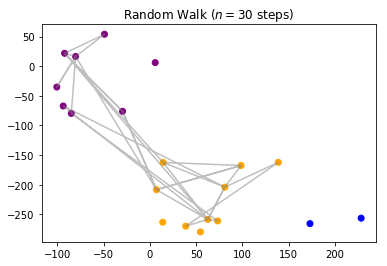

In [138]:
# defining the number of steps
n = 30
 
#creating two array for containing x and y coordinate
#of size equals to the number of size and filled up with 0's
x = numpy.zeros(n)
y = numpy.zeros(n)
cluster = []
# Adapted code from: https://www.geeksforgeeks.org/random-walk-implementation-python/

#randomly pick starting node
val = random.randint(0, 20)
#set that as current in x and y
x[0] = coords.loc[val, ][0]
y[0] = coords.loc[val, ][1]
cluster.append(sites_w_clusters.loc[val,][0])
for i in range(1, n):
    #get list of transitions that you can jump to with transition probs
    to_transitions = transitions.loc[val, ]
    to_nodes = np.array(to_transitions.index)
    #pick next value based on this probability distribution
    new_val = np.random.choice(to_nodes, p=list(to_transitions))
    x[i] = coords.loc[new_val, ][0]
    y[i] = coords.loc[new_val, ][1]
    cluster.append(sites_w_clusters.loc[new_val,][0])
    val = new_val

pylab.title("Random Walk ($n = " + str(n) + "$ steps)")
colors = ['orange','purple', 'blue']
pylab.scatter(np.array(coords["X"]),np.array(coords["Y"]), marker = "o", c=coords_w_clusters['clusters'], cmap=matplotlib.colors.ListedColormap(colors))
pylab.plot(x, y, color="grey", alpha=0.5)

#pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
pylab.show()